# Section 3
3. Import Libraries  
• Create a code block to import the following libraries: 
o numpy as np 
o pandas as pd  
o matplotlib.pyplot as plt 
o statsmodels 
o statsmodels.api as sm 
o seaborn as sns 
o Set the plt.style.use to ‘seaborn’ 

In [1]:
#CodeBlock Section 3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns

plt.style.use('seaborn')

# Section 4-1
• Create a code block to import ‘Real Estate Data – Week 4.csv’ as df_realestate  with 
index_col = 0 and header=0. (Note, the path should be similar ‘data/Real Estate 
Data – Week 4.csv’.) 

In [2]:
# CodeBlock Section 4-1
df_realestate = pd.read_csv('data/Real Estate Data - Week 4.csv', index_col = 0, header = 0 )

# Section 4-2
• Create a code block and execute to view the .info() for df_realestate. 

In [3]:
# CodeBlock Section 4-2
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dwelling Type             1390 non-null   object 
 1   Lot Frontage              1138 non-null   float64
 2   Lot Area                  1390 non-null   int64  
 3   Alley                     83 non-null     object 
 4   Land Contour              1390 non-null   object 
 5   Neighborhood              1390 non-null   object 
 6   Location Condition        1390 non-null   object 
 7   Overall Quality           1390 non-null   int64  
 8   Overall Cond              1390 non-null   int64  
 9   Year Built                1390 non-null   int64  
 10  Masonry/Veneer Area       1382 non-null   float64
 11  Basement Finished Area    1390 non-null   int64  
 12  Basement Unfinished Area  1390 non-null   int64  
 13  Basement Area             1390 non-null   int64  
 14  1st Floo

# Section 5a1
• Create a code block and drop 'Alley' and 'Garage Yr Built'  
o Note: We are dropping these two features because they have null values 
that we do not think we can impute (fillna’s).

In [4]:
# CodeBlock Section 5a1
df_realestate = df_realestate.drop(['Alley', 'Garage Yr Built'], axis = 1)
df_realestate.head(2)

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,2003,196.0,...,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,1976,0.0,...,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500


# Section 5a2
• Create a code block and drop ‘Year Built’  
o Note: We are dropping this feature because we do not feel the year built 
should be included since the year a home is built normally is not a factor. 

In [5]:
# CodeBlock Section 5a2
df_realestate = df_realestate.drop('Year Built', axis = 1)
df_realestate.head(2)

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500


# Section 5a3

• Create a code block and drop ‘Basement Area’ 
o Note: We are dropping this feature because ‘Basement Area’ = ‘Basement 
Unfinished Area’ + ‘Basement Finished Area’, therefore it would be 
redundant to include all 3. 

In [6]:
# CodeBlock Section 5a3
df_realestate = df_realestate.drop('Basement Area', axis = 1)
df_realestate.head(2)

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500


# Section 5b1

Create a code block to fill in NaN’s for ‘Lot Frontage’ with a 0. 
o Note: We are assuming that a null value (NaN) for ‘Lot Frontage’ means the 
actual lot frontage is 0. 

In [7]:
# CodeBlock Section 5b1

df_realestate['Lot Frontage'] = df_realestate['Lot Frontage'].fillna(0)
df_realestate[df_realestate['Lot Frontage']==0]

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
8,2-STORY 1946 & NEWER,0.0,10382,Level,Northwest Ames,Near Pos Feature,7,6,240.0,859,...,Rough Finished,2,235,204,228,0,0,0,Normal Sale,200000
13,1-STORY 1946 & NEWER,0.0,12968,Level,Sawyer,Normal,5,6,0.0,737,...,Unfinished,1,140,0,0,0,176,0,Normal Sale,144000
15,1-STORY 1946 & NEWER,0.0,10920,Level,North Ames,Normal,6,5,212.0,733,...,Rough Finished,1,0,213,176,0,0,0,Normal Sale,157000
17,1-STORY 1946 & NEWER,0.0,11241,Level,North Ames,Normal,6,7,180.0,578,...,Finished,2,0,0,0,0,0,0,Normal Sale,149000
25,1-STORY 1946 & NEWER,0.0,8246,Level,Sawyer,Normal,5,8,0.0,188,...,Unfinished,1,406,90,0,0,0,0,Normal Sale,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1-STORY 1946 & NEWER,0.0,9503,Level,North Ames,Normal,5,5,0.0,457,...,Unfinished,1,316,28,0,0,0,0,Normal Sale,144000
1430,1-STORY 1946 & NEWER,0.0,12546,Level,Northwest Ames,Normal,6,7,310.0,678,...,Finished,2,0,0,99,0,0,0,Normal Sale,182900
1432,1-STORY PUD,0.0,4928,Level,Northpark Villa,Normal,6,6,0.0,958,...,Rough Finished,2,0,60,0,0,0,0,Normal Sale,143750


# Section 5b2

• Create a code block to fill in NaN’s for ‘Masonry/Veneer Area’ with a 0. 
o Note: We are assuming that a null value (NaN) for ‘Masonry/Veneer 
Area’means the actual masonry or veneer area is 0. 

In [8]:
# CodeBlock Section 5b2

df_realestate['Masonry/Veneer Area'] = df_realestate['Masonry/Veneer Area'].fillna(0)
df_realestate[df_realestate['Masonry/Veneer Area']==0]

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,Unfinished,3,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000
6,1-1/2 STORY ALL AGES,85.0,14115,Level,Mitchell,Normal,5,5,0.0,732,...,Unfinished,2,40,30,0,320,0,0,Normal Sale,143000
9,1-1/2 STORY ALL AGES,51.0,6120,Level,Old Town,Adjacent Arterial St,7,5,0.0,0,...,Unfinished,2,90,0,205,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",129900
10,2 FAMILY CONVERSION,50.0,7420,Level,Brookside,Adjacent Arterial St,5,6,0.0,851,...,Rough Finished,1,0,4,0,0,0,0,Normal Sale,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1-STORY 1946 & NEWER,62.0,7500,Level,Somerset,Normal,7,5,0.0,410,...,Rough Finished,2,0,113,0,0,0,0,Normal Sale,185000
1456,2-STORY 1946 & NEWER,62.0,7917,Level,Gilbert,Normal,6,5,0.0,0,...,Rough Finished,2,0,40,0,0,0,0,Normal Sale,175000
1458,2-STORY 1945 & OLDER,66.0,9042,Level,Crawford,Normal,7,9,0.0,275,...,Rough Finished,1,0,60,0,0,0,0,Normal Sale,266500


# Section 5b3
• Create a code block to create a new feature named ‘Porch Area’ that adds up 
'Open Porch Area', 'Enclosed Porch Area', '3 Season Porch Area', 'Screen Porch 
Area', and 'Wood Deck Area'] 
o Adds up means adding the features together to create one new feature, for 
example: 
o df[‘new_feature’] = df[‘old_feature1’] + df[‘old_feature2’] 


In [9]:
# CodeBlock Section 5b3
df_realestate['Porch Area']= df_realestate['Open Porch Area'] + df_realestate['Enclosed Porch Area'] + df_realestate['3 Season Porch Area'] + df_realestate['Screen Porch Area'] + df_realestate['Wood Deck Area']
df_realestate.head()

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price,Porch Area
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,2,0,61,0,0,0,0,Normal Sale,208500,61
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,2,298,0,0,0,0,0,Normal Sale,181500,298
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,2,0,42,0,0,0,0,Normal Sale,223500,42
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,3,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000,307
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,3,192,84,0,0,0,0,Normal Sale,250000,276


# Section 5b4
• Create a code block to create a new feature named ‘Full Bathrooms' that adds up 
'Basement Full Baths' and 'Full Baths Above Grade'.

In [10]:
# CodeBlock Section 5b4
df_realestate['Full Bathrooms']= df_realestate['Basement Full Baths'] + df_realestate['Full Baths Above Grade'] 
df_realestate.head()

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price,Porch Area,Full Bathrooms
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,0,61,0,0,0,0,Normal Sale,208500,61,3
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,298,0,0,0,0,0,Normal Sale,181500,298,2
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,0,42,0,0,0,0,Normal Sale,223500,42,3
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,192,84,0,0,0,0,Normal Sale,250000,276,3


# Section 5b5

• Create a code block to create a new feature named ‘Half Bathrooms' that adds up 
'Basement Half Baths' and ‘Half Baths Above Grade'.

In [11]:
# CodeBlock Section 5b5
 
df_realestate['Half Bathrooms']= df_realestate['Basement Half baths'] + df_realestate['Half Baths Above Grade'] 
df_realestate.head()

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,61,0,0,0,0,Normal Sale,208500,61,3,1
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,0,0,0,0,0,Normal Sale,181500,298,2,1
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,42,0,0,0,0,Normal Sale,223500,42,3,1
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2,0
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,84,0,0,0,0,Normal Sale,250000,276,3,1


# Section 5b6

• Create a code block to drop the features that were used to add up to create ‘Porch 
Area’, ‘Full Bathrooms’, and Half Bathrooms’.

In [12]:
# CodeBlock Section 5b6

df_realestate = df_realestate.drop(['Porch Area', 'Full Bathrooms', 'Half Bathrooms'], axis = 1)
df_realestate.head()

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,Rough Finished,2,0,42,0,0,0,0,Normal Sale,223500
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,Unfinished,3,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,Rough Finished,3,192,84,0,0,0,0,Normal Sale,250000


# Section 5c1 Scatterplot
• Create a code block to create a scatterplot comparing x = ‘Living Area Above 
Grade’ and y = ‘Sale Price’. 
o Note: your scatterplot does not have to be exact to the figure below, but it 
should help you to see that there are two homes well above 4,000 for ‘Living 
Area Above Grade’. 
 
Figure 2: Scatterplot comparing Sale Price and Living Area Above Grade  
(in red are the two outliers) 
 


<AxesSubplot:xlabel='Living Area Above Grade', ylabel='Sale Price'>

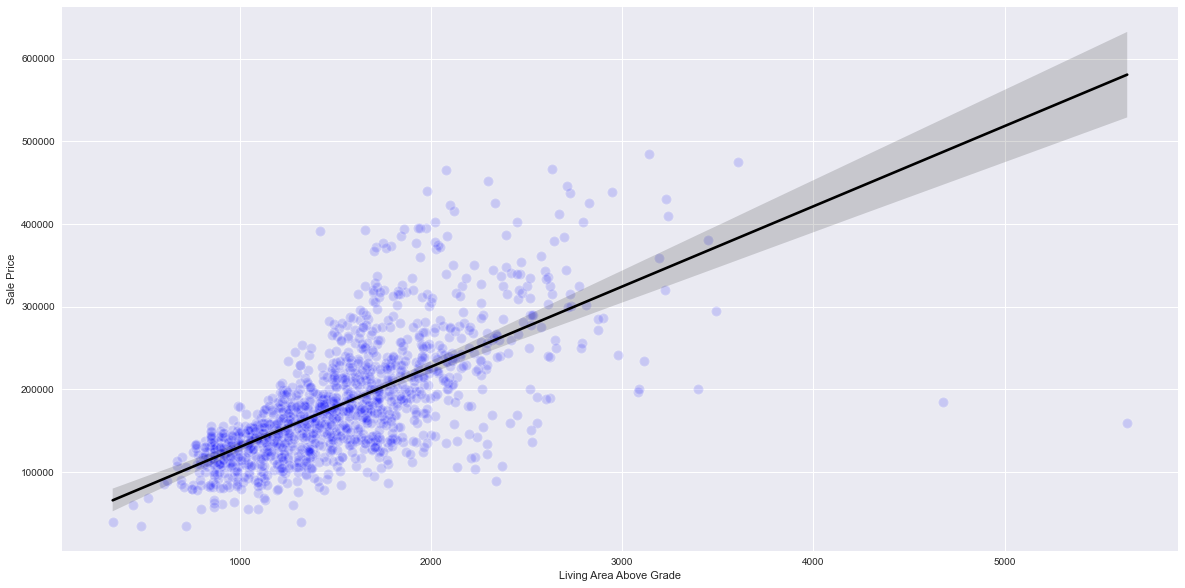

In [13]:
# CodeBlock Section 5c1 Scatterplot
#sns.regplot( x='Living Area Above Grade', y='Sale Price', data= df_realestate, scatter_kws={"color":"blue","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
#plt.title('Scatter Plot for Sale Price Living Area', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
#plt.xlabel('Living Area Above Grade', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
#plt.ylabel('Sale Price', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Living Area Above Grade', y='Sale Price',  
              data = df_realestate, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"},  
              line_kws={'color': 'black'})

# Section 5c2

• Create a code block to view df_realestate where ‘Living Area Above Grade’ is 
greater that 4,000. 
o This is a view only, not a new dataframe.  This is to see the two home that 
have ‘Living Area Above Grade’ above 4,000.

• Looking at the two homes that are above 4,000 ‘Living Area Above Grade’, you 
need to decide if you should keep those two values or drop them.  When deciding, 
ask yourself, “Are you trying to predict the outliers or are you trying to predict a 
normal/average home?”.  Based on that question, we will drop the two records that 
are above 4,000.

In [14]:
# CodeBlock Section 5c2

df_realestate[df_realestate['Living Area Above Grade'] > 4000]
df_realestate.head(2)

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500


# Section 5c3

• Create a code block to change df_realestate where ‘Living Area Above Grade’ is 
greater that 4,000. 
o When changing a dataframe, you must start it with the dataframe and an 
equal sign. (For example df_realestate = ) 
o Your new version of df_realestate should not include those two homes that 
have ‘Living Area Above Grade’ above 4000.

In [15]:
# CodeBlock Section 5c3
# HW guidlines state to get rid of records above 4000 but wouldn't that mean
# setting the df to Less than 4000?
df_realestate = df_realestate[df_realestate['Living Area Above Grade'] <= 4000]

# Section 5c4

• Create a code block that shows the .info( ) for df_realestate. 
o Do a few checks to make sure that your dataset is similar to Figure 3. 
• Notice that the number of records is now 1388 instead of 1390. 
• It should not show the features that you were asked to drop (Section 5a) 
• The features that you filled in NaN’s should have 1388 non-null values 
(Section 5b). (All features should have 1388 non-null values.) 
• It should have new features that you created (Section 5c).

In [16]:
# CodeBlock Section 5c4
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 1 to 1460
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dwelling Type             1388 non-null   object 
 1   Lot Frontage              1388 non-null   float64
 2   Lot Area                  1388 non-null   int64  
 3   Land Contour              1388 non-null   object 
 4   Neighborhood              1388 non-null   object 
 5   Location Condition        1388 non-null   object 
 6   Overall Quality           1388 non-null   int64  
 7   Overall Cond              1388 non-null   int64  
 8   Masonry/Veneer Area       1388 non-null   float64
 9   Basement Finished Area    1388 non-null   int64  
 10  Basement Unfinished Area  1388 non-null   int64  
 11  1st Floor Area            1388 non-null   int64  
 12  2nd Floor Area            1388 non-null   int64  
 13  Living Area Above Grade   1388 non-null   int64  
 14  Basement

# Section 5c5

• Create a code block that shows the .head( ) for df_realestate. 
o Look at 1st Floor Area and 2nd Floor Area and notice how when you add them 
together it equals Living Area Above Grade.  Do we need 1st and 2nd Floor 
Area and Living Area Above Grade or can we drop one?  (Yes, we can drop 
Living Area Above Grade

In [17]:
# CodeBlock Section 5c5
df_realestate.head()

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Garage Finish,Garage Cars,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Sale Condition,Sale Price
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,Rough Finished,2,0,61,0,0,0,0,Normal Sale,208500
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,Rough Finished,2,298,0,0,0,0,0,Normal Sale,181500
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,162.0,486,...,Rough Finished,2,0,42,0,0,0,0,Normal Sale,223500
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,0.0,216,...,Unfinished,3,0,35,272,0,0,0,"Abnormal Sale - trade, foreclosure, short sale",140000
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,350.0,655,...,Rough Finished,3,192,84,0,0,0,0,Normal Sale,250000


# Section 5c6

• Create a code block that drops Living Area Above Grade.

In [18]:
# CodeBlock Section 5c6
df_realestate = df_realestate.drop('Living Area Above Grade', axis = 1)

# Section 5d1

o Create a code block to create a new feature named ‘Pool’ by using a custom 
function that determines if ‘Pool Area’ is greater than 0.  If it is greater than 
0, then label it as a 1, else label it as a 0.  (Hint: this is the only time we will 
show you the code for creating a function.  Future functions you will need to 
figure out the code. 
   

In [19]:
# CodeBlock Section 5d1

df_realestate['Pool Area'] = df_realestate['Pool Area'].fillna(0)

def pool(c):
 if c['Pool Area'] == 0:
    return 'No'
 else:
    return 'Yes'
df_realestate['Pool'] = df_realestate.apply(pool, axis =1)


# Section 5d2

• Create a code block to show the value counts for ‘Kitchens Above Grade’ 
o Notice that there are 59 (57 with 2 and 2 with 3) kitchens. 

In [20]:
# CodeBlock Section 5d2

df_realestate['Kitchens Above Grade'].value_counts()

1    1329
2      57
3       2
Name: Kitchens Above Grade, dtype: int64

# Section 5d3

• Create a code block to create a new feature named ‘Extra Kitchens’. 
o Since each home either has one, two, or three kitchens, ‘Extra Kitchens’ 
should be calculated by subtracting 1 from ‘Kitchens Above Grade’.  
Therefore, a home with one kitchen will have zero extra kitchens.

In [21]:
# CodeBlock Section 5d3
df_realestate['Extra Kitchens'] = df_realestate['Kitchens Above Grade'] -1


# Section 5d4

• Drop ‘Kitchen Above Grade’   

In [22]:
# CodeBlock Section 5d4
df_realestate = df_realestate.drop('Kitchens Above Grade', axis = 1)

# Section 5d5

• Create a code block that shows the value counts for ‘Total Rooms Above Grade’. 
o Notice that the least amount of rooms is 2 with the most being 14.

In [23]:
# CodeBlock Section 5d5
df_realestate['Total Rooms Above Grade'].value_counts()

6     393
7     324
5     256
8     181
4      84
9      72
10     43
11     15
3      11
12      7
2       1
14      1
Name: Total Rooms Above Grade, dtype: int64

# Section 5d6

• Create a code block to create a new feature named ‘Bathroom Percentage’. 
o ‘Bathroom Percentage’ should be the total bathrooms (‘Full Bathrooms’ + 
‘Half Bathrooms) divided by ‘Total Rooms Above Grade’.

In [24]:
# CodeBlock Section 5d6
# Need to add half bathrooms back in order for formula to work
df_realestate['Half Bathrooms']= df_realestate['Basement Half baths'] + df_realestate['Half Baths Above Grade'] 


In [25]:
# CodeBlock Section 5d6
# Need to add full bathrooms back in order for formula to work
df_realestate['Full Bathrooms']= df_realestate['Basement Full Baths'] + df_realestate['Full Baths Above Grade'] 


In [26]:
# CodeBlock Section 5d6
# Bathroom percentage formula
df_realestate['Bathroom Percentage'] = (df_realestate['Full Bathrooms'] + df_realestate['Half Bathrooms']) / df_realestate['Total Rooms Above Grade'] 

# Section 5d7

• Create a code block that views the value counts for ‘Bedrooms Above Grade’.   
o Notice that there are 5 homes with no bedrooms. 

In [27]:
# CodeBlock Section 5d7
df_realestate['Bedrooms Above Grade'].value_counts()

3    788
2    326
4    201
1     41
5     20
6      6
0      5
8      1
Name: Bedrooms Above Grade, dtype: int64

# Section 5d8

Create a code block that uses a defined function to create new feature named Baths 
per Bedroom. (You need to use a defined function because you cannot divide by zero bedrooms.) 
o If ‘Bedrooms Above Grade’ == 0 then return 0. 
o Else divide ‘Full Bathrooms’ divided by ‘Bedrooms Above Grade’.

In [28]:
# CodeBlock Section 5d8
# Double Check this code block. 

def BedroomsAboveGrade(c):
 if c['Bedrooms Above Grade'] == 0:
    return 0
 else:
    return c['Full Bathrooms'] / c['Bedrooms Above Grade']
df_realestate['Baths per Bedroom'] = df_realestate.apply(BedroomsAboveGrade, axis =1)

This bullet point is in the HW guidlines twice. See code block section 5d6.

• Create a code block to create a new feature named ‘Bathroom Percentage’. 
o ‘Bathroom Percentage’ should be the total bathrooms (‘Full Bathrooms’ + 
‘Half Bathrooms) divided by ‘Total Rooms Above Grade’. 
 
 


# Section 6a1
• Create a code block to view the .info() for df_realestate. 

In [29]:
# CodeBlock Section 6a1
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dwelling Type             1388 non-null   object 
 1   Lot Frontage              1388 non-null   float64
 2   Lot Area                  1388 non-null   int64  
 3   Land Contour              1388 non-null   object 
 4   Neighborhood              1388 non-null   object 
 5   Location Condition        1388 non-null   object 
 6   Overall Quality           1388 non-null   int64  
 7   Overall Cond              1388 non-null   int64  
 8   Masonry/Veneer Area       1388 non-null   float64
 9   Basement Finished Area    1388 non-null   int64  
 10  Basement Unfinished Area  1388 non-null   int64  
 11  1st Floor Area            1388 non-null   int64  
 12  2nd Floor Area            1388 non-null   int64  
 13  Basement Full Baths       1388 non-null   int64  
 14  Basement

# Section 6a1
• Create a code block to create the X and y datasets. 
o The X dataset should include: 
§ 'Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond', 
'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished 
Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total 
Rooms Above Grade', 'Fireplaces',  'Garage Cars', 'Porch Area', 'Full 
Bathrooms', 'Half Bathrooms',  'Extra Kitchens', 'Bathroom Percentage', 
and 'Baths per Bedroom' 
o The y dataset is ‘Sale Price’ 

In [30]:
# CodeBlock Section 6a1
# Need porch area back in. 
df_realestate['Porch Area']= df_realestate['Open Porch Area'] + df_realestate['Enclosed Porch Area'] + df_realestate['3 Season Porch Area'] + df_realestate['Screen Porch Area'] + df_realestate['Wood Deck Area']


In [31]:
# CodeBlock Section 6a1
X = df_realestate[['Lot Frontage','Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Extra Kitchens', 'Bathroom Percentage', 'Baths per Bedroom']]
y = df_realestate['Sale Price']

# Section 6b1

• Create a code block and execute a multiple regression using statsmodels (See 
Video C1S7.Py04: Multiple regression with residuals). Make sure to include the 
following: 
o Add a constant 
o Use y and X to fit the model and name the model reg. 
o Use X to predict with the model and name it pred. 
o Use the model (reg) to create the residuals and name it resid. 
o Show a summary of the results. 
 

In [32]:
# CodeBlock Section 6b1
X = df_realestate[['Lot Frontage','Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Extra Kitchens', 'Bathroom Percentage', 'Baths per Bedroom']]
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     434.0
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:44:45   Log-Likelihood:                -16132.
No. Observations:                1388   AIC:                         3.230e+04
Df Residuals:                    1368   BIC:                         3.241e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -8.709e+04   1.05e+04     -8.286      0.000   -1.08e+05   -6.65e+04
Lot Frontage                82.6625     22.548      3.666      0.000      38.431     126.894
Lot Area                     0.5276      0.079      6.694      0.000       0.373       0.682
Overall Quality           1.879e+04    882.704     21.285      0.000    1.71e+04    2.05e+04
Overall Cond              3278.6962    703.488      4.661      0.000    1898.664    4658.729
Masonry/Veneer Area         21.7737      4.759      4.575      0.000      12.438      31.109
Basement Finished Area      33.6315      3.213     10.467      0.000      27.329      39.934
Basement Unfinished Area    17.7515      2.948      6.022      0.000      11.969      23.534
1st Floor Area              28.2108      2.143     13.164      0.000      24.007      32.415
2nd Floor Area              22.1136      1.833     12.065      0.000      18.518      25.709
Bedrooms Above Grade     -4496.6410    900.170     -4.995      0.000   -6262.504   -2730.778
1st Floor Area              28.2108      2.143     13.164      0.000      24.007      32.415
2nd Floor Area              22.1136      1.833     12.065      0.000      18.518      25.709
Bedrooms Above Grade     -4496.6410    900.170     -4.995      0.000   -6262.504   -2730.778
Total Rooms Above Grade    140.5846   1721.048      0.082      0.935   -3235.595    3516.764
Fireplaces                 579.3308   1380.954      0.420      0.675   -2129.685    3288.347
Garage Cars                 1.2e+04   1389.613      8.632      0.000    9269.510    1.47e+04
Porch Area                  21.0738      5.212      4.044      0.000      10.850      31.298
Full Bathrooms            1.443e+04   3850.933      3.748      0.000    6877.182     2.2e+04
Half Bathrooms            1.149e+04   4034.468      2.848      0.004    3576.532    1.94e+04
Extra Kitchens           -2.837e+04   4024.665     -7.048      0.000   -3.63e+04   -2.05e+04
Bathroom Percentage      -4.742e+04   2.35e+04     -2.021      0.043   -9.34e+04   -1394.156
Baths per Bedroom         1655.5818   4356.216      0.380      0.704   -6890.006    1.02e+04
==============================================================================
Omnibus:                      116.041   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.173
Skew:                           0.341   Prob(JB):                     4.73e-93
Kurtosis:                       5.624   Cond. No.                     3.40e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.53e-30. This might indicate that there are
strong multicol

# CodeBlock Section 6b2 Explain Results:


In the summary we have sale price as the target variable with 22 feature variables (porch area, baths per bedroom, bathroom percentage etc.).

Is the model significant? 
Yes, the R squared is 0.858 and adjusted R squared is 0.856, which indicates that the overall relationship with the target variable and feature variables are highly correlated.  Additionally, one could see that the p values for features are significant with the exception of fireplaces (0.713), bathroom percentage (0.069) and bathrooms per bedroom (0.702) which indicate they are not significant. 


Are all of the features significant?  

No, majority of the feature variables have a p value of 0.0 or less than 0.05, which indicates they are significant explaining the variation in the target variable. There are only 3 feature variables that have a p value greater than 0.5: Fireplaces, Bathroom Percentage and Bathrooms per bedroom, which indicate they are not significant explaining the variation in the target variable.

Is the model a strong relationship?
The R squared is 0.858 and adjusted R squared is 0.856, which is higher than 0.5, which indicate that there is a strong overall correlation as the values are closer to 1.  Therefore, one can conclude that the variation in the target variable, sale price, is explained by the features variables:  Lot Frontage (0.000), Lot Area (0.000), Overall Cond (0.000), Masonry/Veneer area(0.000),basement finished area(0.000), basement unfinished area (0.000), 1st floor area (0.000), 2nd floor area (0.000), bedrooms above grade (0.000), total rooms above grade (0.047), garage cars (0.000), porch area(0.000), full bathrooms(0.045), half bathrooms(0.018) and extra kitchens (0.000); all of which have a p-value less than 0.05 which, indicates they are significant. 


# Section 6c1

• Create a code block for a jointplot (Should look similar to Figure 6). 
o x is pred 
o y is resid 
o kind is "reg"  
o ratio=5 and height = 8 (#this helps improve the size of the plot)  
o line_kws (#this will change the look of the regression trend line)  
§ {'color': 'black'} 

In [33]:
# CodeBlock Section 6c1
# Need to concatanate pred and resid to df. 
df_realestate = pd.concat([df_realestate,pred,resid], axis=1)


In [34]:
# CodeBlock Section 6c1
# renaming columns to pred and resid
df_realestate = df_realestate.rename(columns = {0:'pred', \
                                               1: 'resid'})
df_realestate.head(2)

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,...,Sale Price,Pool,Extra Kitchens,Half Bathrooms,Full Bathrooms,Bathroom Percentage,Baths per Bedroom,Porch Area,pred,resid
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,196.0,706,...,208500,No,0,1,3,0.5,1.000000,61,219544.054957,-11044.054957
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,0.0,978,...,181500,No,0,1,2,0.5,0.666667,298,195143.758805,-13643.758805


<Figure size 1440x576 with 0 Axes>

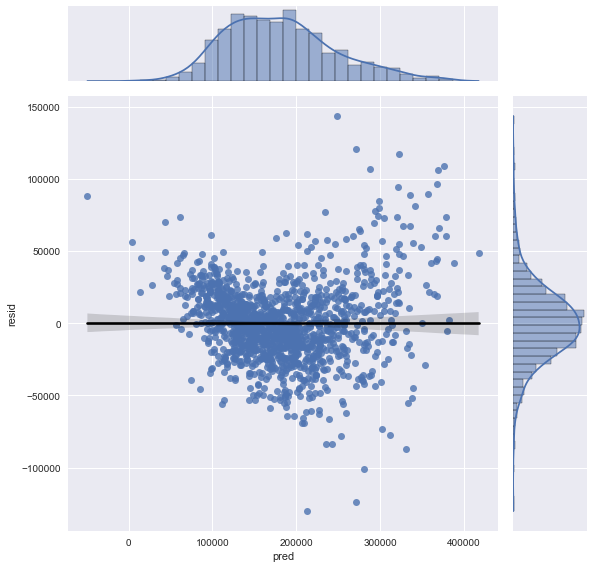

In [35]:
# CodeBlock Section 6c1
# Joint Plot.  
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
sns.jointplot(y='resid', x='pred',kind='reg', data= df_realestate, ratio=5, height = 8, line_kws={'color': 'black'})

# Section 6c1

• Create a VIF for the features in the multiple regression (See Video C1S8.Py04: 
 Calculating VIF for features in a model). 
o Name the DataFrame vif. 
o vif should include two columns [‘VIF Factor’ and ‘Features’]  
o Sort and show vif by ‘VIF Factor’ and from largest to smallest. 
o Note: Notice that ‘Bathroom Percentage’ has the highest VIF.

In [36]:
# CodeBlock Section 6c1 continued
# importing variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
# CodeBlock Section 6c1 continued
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)


C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
11,inf,1st Floor Area
8,inf,1st Floor Area
13,inf,Bedrooms Above Grade
12,inf,2nd Floor Area
10,inf,Bedrooms Above Grade
9,inf,2nd Floor Area
0,207.5,const
21,18.5,Bathroom Percentage
18,14.4,Full Bathrooms
14,13.6,Total Rooms Above Grade


# Section 6c2

Create a code block to create a DataFrame named features that includes all of the 
features in the X dataset only (no ‘const’).  Make sure to drop ‘const’. (See Video 
C1.S8.Py05 - Re-run a multiple regression because of multi-collinearity). 

In [38]:
# CodeBlock Section 6c2
features = X
features.drop('const', axis = 1)

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,...,Bedrooms Above Grade,Total Rooms Above Grade,Fireplaces,Garage Cars,Porch Area,Full Bathrooms,Half Bathrooms,Extra Kitchens,Bathroom Percentage,Baths per Bedroom
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,196.0,706,150,856,854,3,...,3,8,0,2,61,3,1,0,0.500000,1.000000
2,80.0,9600,6,8,0.0,978,284,1262,0,3,...,3,6,1,2,298,2,1,0,0.500000,0.666667
3,68.0,11250,7,5,162.0,486,434,920,866,3,...,3,6,1,2,42,3,1,0,0.666667,1.000000
4,60.0,9550,7,5,0.0,216,540,961,756,3,...,3,7,1,3,307,2,0,0,0.285714,0.666667
5,84.0,14260,8,5,350.0,655,490,1145,1053,4,...,4,9,1,3,276,3,1,0,0.444444,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,0.0,0,953,953,694,3,...,3,7,1,2,40,2,1,0,0.428571,0.666667
1457,85.0,13175,6,6,119.0,790,589,2073,0,3,...,3,7,2,2,349,3,0,0,0.428571,1.000000
1458,66.0,9042,7,9,0.0,275,877,1188,1152,4,...,4,9,2,1,60,2,0,0,0.222222,0.500000


# Section 6c3

• Create a code block and create a correlation matrix for the features in the features 
DataFrame.  Name the new correlation matrix corrMatrix.

In [39]:
# CodeBlock Section 6c3
corrMatrix = features.corr()

# Section 6c4

• Create a code block that converts corrMatrix to a DataFrame and name the new 
DataFrame df_corrMatrix. 

In [40]:
# CodeBlock Section 6c4
df_corrMatrix = pd.DataFrame(corrMatrix)

# Section 6c5

• Create a code block that create a heatmap.  It should include: 
o Set the colormap to RdBu.  You can do this with this as the top line of code in 
this code block. 
§ colormap = plt.cm.RdBu 
o Heatmap should include the following: 
§ df_corrMatrix 
§ linewidths is 0.1 
§ vmax is 1.0, vmin= -1.0, #this sets the max and min scale 
§ square=True 
§ cmap=colormap #uses the colormap we created for colors 
§ linecolor='white' 
§ annot=True #this adds the actual correlations into each square 

<AxesSubplot:title={'center':'Heat Map for CorrMatrix'}>

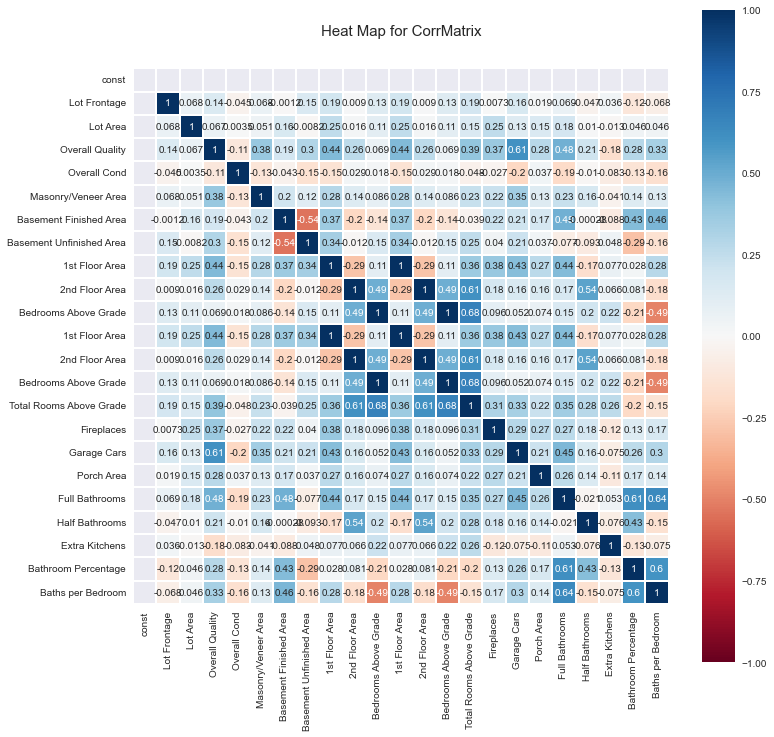

In [41]:
# CodeBlock Section 6c5

colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Heat Map for CorrMatrix', y=1.05, size=15)
sns.heatmap(df_corrMatrix, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True, cmap = colormap, linecolor= 'white', annot= True)

# CodeBlock Section 6c6 Explain the Results:
• After running a residual plot (jointplot), a VIF, and a heatmap, give some insight into 
what you see and what you should do next.  
For the residual plot, the residuals are normally distributed which suggests that one can trust the results of the regression. The values of the residuals is not constant which suggests there is no homoscedasticity, which indicates that this regression is violating the assumption of homoscedasticity and thus, the results of the regression could be questionable. 

The VIF values are high for these feature variables: 1st floor area, bedrooms above grade, 2nd floor area, full bathrooms and bathroom percentage which indicates there is a multi-collinearity issue with the coefficient estimates corresponding to those interrelated explanatory variables not being accurate in giving us the actual picture.

What we should do next is to remove explanatory variables with high VIF values to remove the multi-collinearity regression model. 
Should we eliminate any features based on the VIF?  
Yes, we should remove: 1st floor area, bedrooms above grade, 2nd floor area, full bathrooms and bathroom percentage which have high VIF values. 

Are there other features that have a significant relationship to other features?
 Yes, in the heat map the dark blue squares have a positive correlation for example 2nd floor and total rooms above grade are highly correlated (0.61), Garage cars and overall quality are highly correlated (0.61). Also, there are significant negative correlation between basement finished area and 1st floor (-0.54).


# Section 6d1

• Create a code block that creates a new X dataset.  Should include all of the original 
X dataset except ‘Bathroom Percentage’. 

In [42]:
# CodeBlock Section 6d1
X = df_realestate[['Lot Frontage','Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Extra Kitchens', 'Baths per Bedroom']]


# Section 6d2

• Create a code block and execute a multiple regression using statsmodels (See 
Video C1.S8.Py05 - Re-run a multiple regression because of multi-collinearity). 
Make sure to include the following: 
o Add a constant 
o Use y and X to fit the model and name the model reg. 
o Use X to predict with the model and name it pred. 
o Use the model (reg) to create the residuals and name it resid. 
o Show a summary of the results.

In [43]:
# CodeBlock Section 6d2
# What is y supposed to be? hw guidelines doesn't specify. 
X = df_realestate[['Lot Frontage','Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Extra Kitchens', 'Baths per Bedroom']]
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     456.8
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:44:51   Log-Likelihood:                -16134.
No. Observations:                1388   AIC:                         3.231e+04
Df Residuals:                    1369   BIC:                         3.240e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.024e+05   7302.619    -14.021      0.000   -1.17e+05   -8.81e+04
Lot Frontage                86.5056     22.493      3.846      0.000      42.382     130.629
Lot Area                     0.5317      0.079      6.742      0.000       0.377       0.686
Overall Quality           1.873e+04    883.145     21.203      0.000     1.7e+04    2.05e+04
Overall Cond              3229.7178    703.862      4.589      0.000    1848.952    4610.484
Masonry/Veneer Area         21.9260      4.764      4.603      0.000      12.581      31.271
Basement Finished Area      34.0312      3.211     10.600      0.000      27.733      40.329
Basement Unfinished Area    17.9400      2.950      6.082      0.000      12.154      23.726
1st Floor Area              27.9725      2.142     13.058      0.000      23.770      32.175
2nd Floor Area              21.9608      1.833     11.979      0.000      18.364      25.557
Bedrooms Above Grade     -4835.8503    885.382     -5.462      0.000   -6572.702   -3098.999
1st Floor Area              27.9725      2.142     13.058      0.000      23.770      32.175
2nd Floor Area              21.9608      1.833     11.979      0.000      18.364      25.557
Bedrooms Above Grade     -4835.8503    885.382     -5.462      0.000   -6572.702   -3098.999
Total Rooms Above Grade   2982.8863    993.255      3.003      0.003    1034.420    4931.352
Fireplaces                 693.8779   1381.344      0.502      0.616   -2015.902    3403.658
Garage Cars               1.197e+04   1391.140      8.608      0.000    9245.646    1.47e+04
Porch Area                  20.8045      5.216      3.989      0.000      10.573      31.036
Full Bathrooms            7895.1929   2092.997      3.772      0.000    3789.364     1.2e+04
Half Bathrooms            4089.1223   1694.540      2.413      0.016     764.946    7413.298
Extra Kitchens           -3.019e+04   3927.042     -7.687      0.000   -3.79e+04   -2.25e+04
Baths per Bedroom        -1236.1488   4119.189     -0.300      0.764   -9316.755    6844.457
==============================================================================
Omnibus:                      114.413   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.985
Skew:                           0.345   Prob(JB):                     4.21e-89
Kurtosis:                       5.561   Cond. No.                     2.86e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.58e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Section 6d3

• Create a VIF for the features in the new multiple regression model. 

In [44]:
# CodeBlock Section 6d3
# importing variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# CodeBlock Section 6d3
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)


C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
11,inf,1st Floor Area
8,inf,1st Floor Area
13,inf,Bedrooms Above Grade
12,inf,2nd Floor Area
10,inf,Bedrooms Above Grade
9,inf,2nd Floor Area
0,99.9,const
14,4.5,Total Rooms Above Grade
21,4.4,Baths per Bedroom
18,4.2,Full Bathrooms


# Section 6d4

• Create a code block that create a heatmap (should follow the same properties as 
the original heatmap, but with the new X dataset.

In [46]:
# CodeBlock Section 6d4
# creating correlation with new x data set
corrMatrix = X.corr()

In [47]:
# CodeBlock Section 6d4
# Converting to new x data set to new data frame. 
df_X = pd.DataFrame(corrMatrix)

<AxesSubplot:title={'center':'Heat Map for X'}>

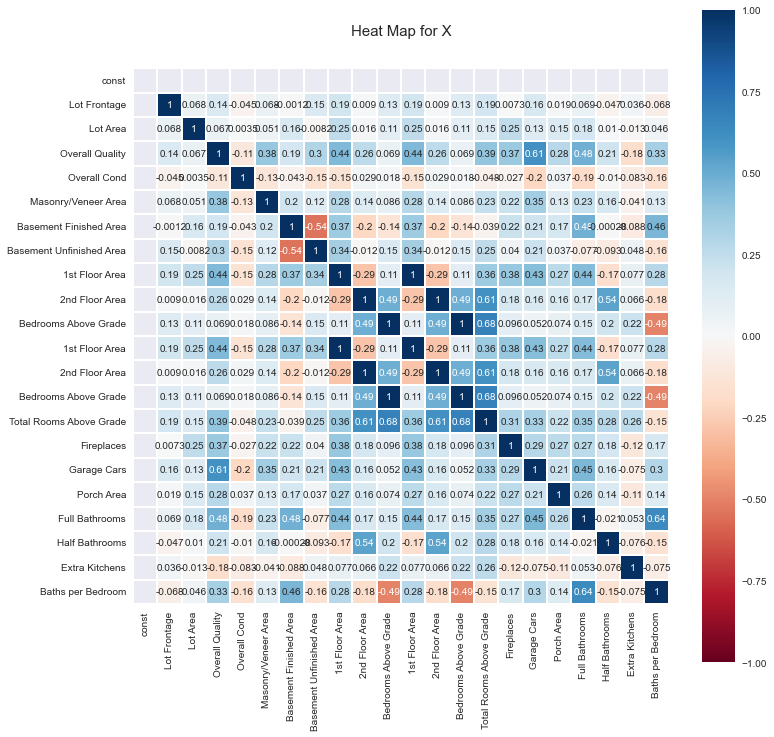

In [48]:
# CodeBlock Section 6d4
#Heat Map
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Heat Map for X', y=1.05, size=15)
sns.heatmap( df_X, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True, cmap = colormap, linecolor= 'white', annot= True)

# CodeBlock Section 6d5 Explain Results of the new Multiple Regression:

In the summary we have sale price as the target variable with 21 feature variables (porch area, baths per bedroom, bathroom percentage etc.).

Is the model significant? 
Yes, the R squared is 0.857 and adjusted R squared is 0.855, which indicates that the overall relationship with the target variable and feature variables are highly correlated.  Additionally, one could see that the p values for features are significant with the exception of fireplaces (0.616) and bathrooms per bedroom (0.764) which indicate they are not significant. 


Are all of the features significant?  

No, majority of the feature variables have a p value of 0.0 or less than 0.05, which indicates they are significant explaining the variation in the target variable. There are only 2 feature variables that have a p value greater than 0.5: Fireplaces and Bathrooms per bedroom, which indicate they are not significant explaining the variation in the target variable.

Is the model a strong relationship?
The R squared is 0.857 and adjusted R squared is 0.855, which is higher than 0.5, which indicate that there is a strong overall correlation as the values are closer to 1.  Therefore, one can conclude that the variation in the target variable, sale price, is explained by the features variables:  Lot Frontage (0.000), Lot Area (0.000), Overall Cond (0.000), Masonry/Veneer area(0.000),basement finished area(0.000), basement unfinished area (0.000), 1st floor area (0.000), 2nd floor area (0.000), bedrooms above grade (0.000), total rooms above grade (0.003), garage cars (0.000), porch area(0.000), full bathrooms(0.000), half bathrooms(0.016) and extra kitchens (0.000); all of which have a p-value less than 0.05 which, indicates they are significant.



# CodeBlock Section 7, Summary and Explanation of All Steps.

o Explain the rationale for creating or deleting features.

We needed to identify and remove features with a p value greater 0.05 and a high VIF value because they do not contribute to explain the variation and the target variable.  
o What is the relationship between the features and target variable in the original 
model? 

In the original model, we found a high correlation in the R squared and adjusted R squared; however, we also found a multi-collinearity problem because the residual values are not constant, which seems to suggest that the coefficient estimates corresponding to those interrelated explanatory variables not being accurate in giving us the actual picture.

§ Indicate measures that explain relationship.

The features variables:  Lot Frontage (0.000), Lot Area (0.000), Overall Cond (0.000), Masonry/Veneer area(0.000),basement finished area(0.000), basement unfinished area (0.000), 1st floor area (0.000), 2nd floor area (0.000), bedrooms above grade (0.000), total rooms above grade (0.047), garage cars (0.000), porch area(0.000), full bathrooms(0.045), half bathrooms(0.018) and extra kitchens (0.000); all of which have a p-value less than 0.05 which, indicates they are significant.

o What do the plots and VIF help you assess? 

The plots and VIF values help assess the normality of the distribution of the residuals and whether there is a multi-collinearity problem to determine if one can trust the results of the coefficients in the regression model. 

o What is the relationship between the features and target variable in the new 
model? 
In the revised model, we found a high correlation in the R squared (0.857) and adjusted R squared (0.855) which indicate a strong relationship between the feature variables and the target variable. 

§ Indicate measures that explain relationship. 

The features variables:  Lot Frontage (0.000), Lot Area (0.000), Overall Cond (0.000), Masonry/Veneer area(0.000),basement finished area(0.000), basement unfinished area (0.000), 1st floor area (0.000), 2nd floor area (0.000), bedrooms above grade (0.000), total rooms above grade (0.003), garage cars (0.000), porch area(0.000), full bathrooms(0.000), half bathrooms(0.016) and extra kitchens (0.000); all of which have a p-value less than 0.05 which, indicates they are significant.

§ Is it just as good as the original model? 

It is as good as the original model with the caveat that we did not do the residual plot for the second model. But, the VIF values indicate that there is a multi-collinearity issue with the following variables: 1st floor area, 2nd floor area and bed rooms above grade, which have a high VIF value (inf).

o Include a summary of the practical implications of the results, what does it mean 
in real terms?  

In real terms, these feature variables: 1st floor area, 2nd floor area and bed rooms above grade may not be trusted as predictors of the target variable sale price. 
